# 定性预测变量

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st

## 0.数据处理

In [2]:
Salary_data = pd.read_csv("/Users/luofeifei/study/RegressionAnalysis/All_Data/P130.txt",sep = "\t")

In [3]:
Salary_data.head()

,S,X,E,M
0,13876,1,1,1
1,11608,1,3,0
2,18701,1,3,1
3,11283,1,2,0
4,11767,1,3,0


In [4]:
def isHS(x):
    return x==1  

def isBS(x):
    return x==2

E1 = Salary_data.E.apply(isHS)
E2 = Salary_data.E.apply(isBS)

In [5]:
Iv = pd.concat([E1,E2],axis=1)
Iv.columns = ["E1","E2"]

In [6]:
Salary_data = pd.concat([Salary_data,Iv],axis=1)

## 1.建模

In [7]:
Salary_model = smf.ols("S~X+E1+E2+M",Salary_data).fit()

In [8]:
print(Salary_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     226.8
Date:                Wed, 09 Sep 2020   Prob (F-statistic):           2.23e-27
Time:                        17:59:49   Log-Likelihood:                -381.63
No. Observations:                  46   AIC:                             773.3
Df Residuals:                      41   BIC:                             782.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.103e+04    383.217     28.787      0.0

## 2.交互变量

In [9]:
res = Salary_model.resid.values
sigma = np.sqrt(sum(res**2)/Salary_model.df_resid)

In [10]:
def get_pii(river_data):
    X_C = sm.add_constant(river_data)
    XX_T = np.dot(X_C.values.T,X_C.values).astype(np.float)
    left = np.dot(X_C,(np.linalg.inv(XX_T)))
    P = np.dot(left,X_C.T)
    pii = []
    for i in range(P.shape[0]):
        pii.append(P[i][i])
    return pii
pii = get_pii(Salary_data[["X","E1","E2","M"]])

In [11]:
standardError = res/sigma*np.sqrt(1-np.array(pii))

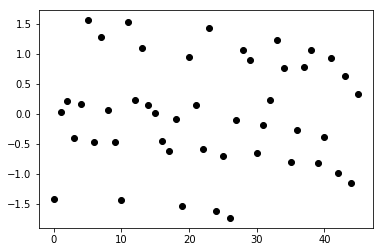

In [12]:
fig, ax = plt.subplots()
plt.plot(standardError,'ko')
plt.show()

In [13]:
results = pd.concat([Salary_data,pd.DataFrame(standardError)],axis=1)
lname = list(Salary_data.columns)
lname.append("res")
results.columns = lname

In [14]:
def categary(M,E1,E2,data):
    ans = []
    for i in range(data.shape[0]):
        if data["M"][i]==M and data["E1"][i] == E1 and data["E2"][i] == E2:
            ans.append(data["res"][i])
    return ans
C1 = categary(0,1,0,results)
X1 = np.ones_like(C1)
C2 = categary(1,1,0,results)
X2 = np.full_like(C2,2)
C3 = categary(0,0,1,results)
X3 = np.full_like(C3,3)
C4 = categary(1,0,1,results)
X4 = np.full_like(C4,4)
C5 = categary(0,0,0,results)
X5 = np.full_like(C5,5)
C6 = categary(1,0,0,results)
X6 = np.full_like(C6,6)

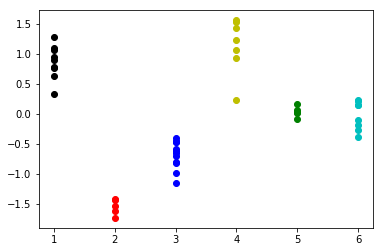

In [18]:
fig, ax = plt.subplots()
plt.plot(X1,C1,'ko')
plt.plot(X2,C2,'ro')
plt.plot(X3,C3,'bo')
plt.plot(X4,C4,'yo')
plt.plot(X5,C5,'go')
plt.plot(X6,C6,'co')
plt.show()

In [24]:
cross_model = smf.ols("S~X+E1+E2+M+E1*M+E2*M",data=Salary_data).fit()

In [25]:
print(cross_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5517.
Date:                Wed, 09 Sep 2020   Prob (F-statistic):           1.67e-55
Time:                        18:29:35   Log-Likelihood:                -298.74
No. Observations:                  46   AIC:                             611.5
Df Residuals:                      39   BIC:                             624.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      1.12e+04     79.065    141.698   

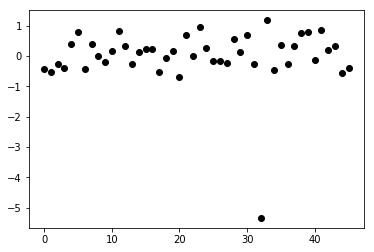

In [27]:
fig, ax = plt.subplots()
plt.plot(cross_model.resid_pearson,'ko')
plt.show()

In [30]:
stdata = pd.DataFrame(cross_model.resid_pearson,columns=['stError'])
out = pd.concat([Salary_data,stdata],axis=1)

In [33]:
#out

In [32]:
Salary_data.drop(index=32,inplace=True)
Salary_data

,S,X,E,M,E1,E2
0,13876,1,1,1,True,False
1,11608,1,3,0,False,False
2,18701,1,3,1,False,False
3,11283,1,2,0,False,True
4,11767,1,3,0,False,False
5,20872,2,2,1,False,True
6,11772,2,2,0,False,True
7,10535,2,1,0,True,False
8,12195,2,3,0,False,False
9,12313,3,2,0,False,True


In [34]:
cross_model2 = smf.ols("S~X+E1+E2+M+E1*M+E2*M",data=Salary_data).fit()
print(cross_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.543e+04
Date:                Wed, 09 Sep 2020   Prob (F-statistic):           1.30e-69
Time:                        18:40:25   Log-Likelihood:                -249.34
No. Observations:                  45   AIC:                             512.7
Df Residuals:                      38   BIC:                             525.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      1.12e+04     30.533    366.802   

In [36]:
stdata = pd.DataFrame(cross_model2.resid_pearson,columns=['stError'])
out = pd.concat([Salary_data,stdata],axis=1)

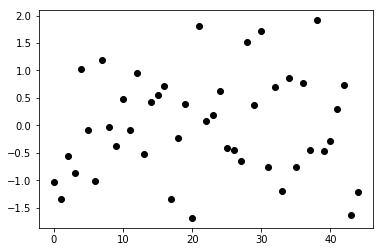

In [37]:
fig, ax = plt.subplots()
plt.plot(cross_model2.resid_pearson,'ko')
plt.show()

In [41]:
def categary(M,E1,E2,data):
    ans = []
    for i in range(data.shape[0]):
        if data["M"][i]==M and data["E1"][i] == E1 and data["E2"][i] == E2:
            ans.append(data["stError"][i])
    return ans
C1 = categary(0,1,0,out)
X1 = np.ones_like(C1)
C2 = categary(1,1,0,out)
X2 = np.full_like(C2,2)
C3 = categary(0,0,1,out)
X3 = np.full_like(C3,3)
C4 = categary(1,0,1,out)
X4 = np.full_like(C4,4)
C5 = categary(0,0,0,out)
X5 = np.full_like(C5,5)
C6 = categary(1,0,0,out)
X6 = np.full_like(C6,6)

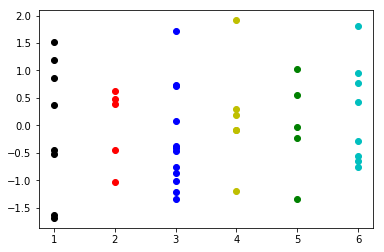

In [42]:
fig, ax = plt.subplots()
plt.plot(X1,C1,'ko')
plt.plot(X2,C2,'ro')
plt.plot(X3,C3,'bo')
plt.plot(X4,C4,'yo')
plt.plot(X5,C5,'go')
plt.plot(X6,C6,'co')
plt.show()

# 示性变量与连续变量的交互项代表两个模型连续变量的系数不同